In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tools import eval_measures

In [2]:
properatti_df_bsas=pd.read_csv("./tp2_properati_no_input.csv", sep=",", encoding='utf-8')
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
22005,81416,Caballito,2625.000000,88.0,3.0,231000.0,231000.0,True,True,False,False,False,False,False,False,False,False,True
30794,118314,Barrio Norte,2880.000000,25.0,1.0,72000.0,72000.0,False,False,False,False,False,False,False,False,False,False,False
11831,46367,Liniers,1666.666667,102.0,4.0,170000.0,170000.0,True,False,False,False,False,False,True,False,False,True,True
22059,81597,Once,NaN,NaN,5.0,194000.0,194000.0,False,False,False,False,False,False,False,False,False,False,False
17236,65536,Barrio Norte,2346.938776,392.0,NaN,920000.0,920000.0,True,True,False,False,False,False,False,False,False,True,False


In [3]:
lista=[]
for col in properatti_df_bsas.columns:
    lista.append(col)
print(lista)

['Unnamed: 0', 'barrio', 'price_usd_per_m2', 'surface_total_clean', 'rooms_clean', 'precios_nuevos', 'precios_aprox_usd_clean', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']


In [4]:
properatti_df_bsas=properatti_df_bsas*1
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
13984,53733,Saavedra,NaN,NaN,8.0,496000.000000,496000.0,1,1,0,1,1,0,0,0,0,0,1
1881,9080,Monserrat,2527.771429,42.0,2.0,107285.556863,106166.4,1,1,0,1,1,1,0,1,0,0,0
24165,88590,Belgrano,3241.289474,38.0,NaN,123169.000000,123169.0,0,0,0,0,0,0,0,0,0,0,0
17037,64580,Nunez,2951.807229,83.0,3.0,245000.000000,245000.0,1,1,1,0,1,0,1,0,0,1,1
23736,87503,Chacarita,2233.333333,60.0,2.0,134000.000000,134000.0,1,1,1,1,0,1,1,1,0,1,1


In [5]:
properatti_df_bsas.shape

(31942, 18)

In [6]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           8819
surface_total_clean        3912
rooms_clean                5901
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [7]:
llenado_nulos=properatti_df_bsas[properatti_df_bsas["price_usd_per_m2"].isnull()]
llenado_nulos.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
18056,70455,NaN,NaN,41.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
29787,114362,Boca,NaN,NaN,3.0,90000.0,90000.0,0,0,0,0,0,0,0,0,0,0,1
22378,83112,San Cristobal,NaN,53.0,3.0,130000.0,130000.0,1,0,0,0,0,0,1,0,0,0,0
7006,26946,Once,NaN,91.0,4.0,50000.0,50000.0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
mask_precio=llenado_nulos[llenado_nulos["precios_nuevos"].notnull()]

In [9]:
mask_precio.head(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
2,3,Liniers,NaN,NaN,3.0,95000.00000,95000.00,0,0,0,0,0,0,0,0,0,0,1
24,97,San Telmo,NaN,NaN,1.0,80693.70093,79851.93,0,1,0,0,0,0,0,0,0,0,0
30,120,Belgrano,NaN,NaN,3.0,178000.00000,178000.00,1,1,0,0,0,0,1,0,0,0,0
32,137,Colegiales,NaN,133.0,6.0,249000.00000,249000.00,1,0,0,0,0,0,0,0,0,0,1


In [10]:
mask_precio.shape

(5920, 18)

In [11]:
nonulos=mask_precio[mask_precio["surface_total_clean"].notnull()]
nonulos.isna().sum()

Unnamed: 0                    0
barrio                       33
price_usd_per_m2           2201
surface_total_clean           0
rooms_clean                 351
precios_nuevos                0
precios_aprox_usd_clean       0
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [12]:
precio_n_por_m2=nonulos["precios_nuevos"]/nonulos["surface_total_clean"]
print(precio_n_por_m2.sample(4))
print(precio_n_por_m2.shape[0])

15237    1400.0
30970    6500.0
861       495.0
3251      515.0
dtype: float64
2201


In [13]:
properatti_df_bsas["price_usd_per_m2"] = properatti_df_bsas["price_usd_per_m2"].fillna(precio_n_por_m2.iloc[:])

In [14]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           6618
surface_total_clean        3912
rooms_clean                5901
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [15]:
properatti_df_bsas.iloc[15522,:]

Unnamed: 0                    59535
barrio                        Nunez
price_usd_per_m2                NaN
surface_total_clean             NaN
rooms_clean                     3.0
precios_nuevos             128000.0
precios_aprox_usd_clean    128000.0
amenities                         0
estacionamiento                   0
sum                               0
pileta                            0
parrilla                          0
gimnasio                          0
lavadero                          0
solarium                          0
quincho                           0
baulera                           0
terraza                           0
Name: 15522, dtype: object

In [16]:
#Se llenaron 5819 campos de la columna price_usd_per_m2
# se elimina la columna precios_aprox_usd_clean por encontrarse repetida
properatti_df_bsas=properatti_df_bsas.drop(labels='precios_aprox_usd_clean', axis=1)

In [17]:
properatti_df_bsas.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
7371,28507,Caballito,1923.076923,78.0,3.0,150000.0,0,0,0,0,0,0,0,0,0,0,0
24907,91769,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
14396,55623,Villa Devoto,2045.454545,44.0,2.0,90000.0,1,1,0,0,0,0,1,0,0,0,1
5362,23263,Saavedra,1888.888889,45.0,1.0,85000.0,1,1,0,0,0,0,0,0,0,0,1


<Axes: >

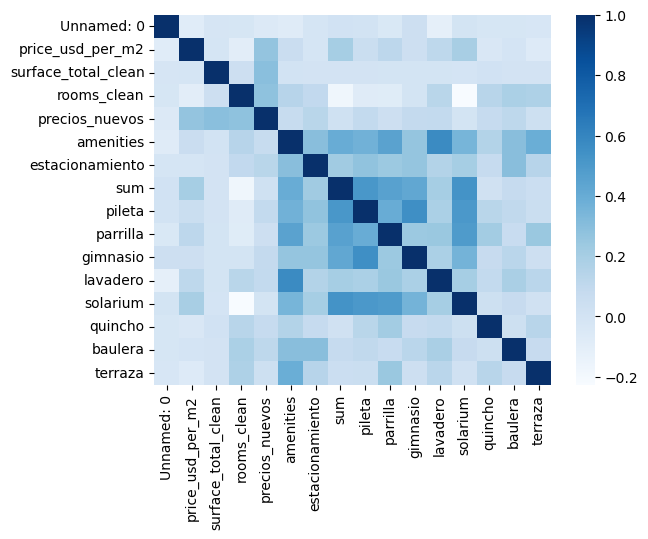

In [18]:
#Se busca alguna tendencia de correlacion para poder llenar las columnas faltantes
import seaborn as sns

correlation1=properatti_df_bsas.select_dtypes("number").corr()
sns.heatmap(correlation1, cmap="Blues")

In [19]:
print(correlation1.price_usd_per_m2)

Unnamed: 0            -0.084241
price_usd_per_m2       1.000000
surface_total_clean   -0.014022
rooms_clean           -0.096318
precios_nuevos         0.265895
amenities              0.058916
estacionamiento       -0.012220
sum                    0.201134
pileta                 0.056289
parrilla               0.116410
gimnasio               0.040058
lavadero               0.110827
solarium               0.197661
quincho               -0.035323
baulera               -0.006090
terraza               -0.064269
Name: price_usd_per_m2, dtype: float64


In [20]:
print(correlation1.precios_nuevos)


Unnamed: 0            -0.057351
price_usd_per_m2       0.265895
surface_total_clean    0.291480
rooms_clean            0.277779
precios_nuevos         1.000000
amenities              0.071491
estacionamiento        0.131545
sum                    0.027701
pileta                 0.093850
parrilla               0.039300
gimnasio               0.086107
lavadero               0.092133
solarium              -0.003342
quincho                0.080883
baulera                0.110101
terraza                0.036478
Name: precios_nuevos, dtype: float64


In [21]:
print(correlation1.surface_total_clean)

Unnamed: 0            -0.018334
price_usd_per_m2      -0.014022
surface_total_clean    1.000000
rooms_clean            0.041144
precios_nuevos         0.291480
amenities              0.005622
estacionamiento        0.001009
sum                    0.001545
pileta                 0.002010
parrilla              -0.002100
gimnasio              -0.002546
lavadero              -0.000703
solarium              -0.009678
quincho                0.012897
baulera                0.000815
terraza               -0.000585
Name: surface_total_clean, dtype: float64


In [22]:
print(properatti_df_bsas.shape)
print(properatti_df_bsas.isna().sum())


(31942, 17)
Unnamed: 0                0
barrio                 1294
price_usd_per_m2       6618
surface_total_clean    3912
rooms_clean            5901
precios_nuevos         2899
amenities                 0
estacionamiento           0
sum                       0
pileta                    0
parrilla                  0
gimnasio                  0
lavadero                  0
solarium                  0
quincho                   0
baulera                   0
terraza                   0
dtype: int64


In [23]:
#Una vez ya terminada de limpiar la columna price-USD_per_m2 se procede a evaluar los métodos de regresión lineal múltiple

In [24]:
#sacamos los nulos para poder realizar las regresiones lineales
#Primero evaluo la cantidad de nulos que quedan si se toma solo los valores no nulos de price por m2
properatti_no_nulos=properatti_df_bsas[properatti_df_bsas["price_usd_per_m2"].notnull()]
properatti_no_nulos.sample(2)
properatti_no_nulos.isnull().sum()
properatti_no_nulos=properatti_no_nulos[properatti_no_nulos["barrio"].notnull()]
properatti_no_nulos.isnull().sum()
properatti_no_nulos=properatti_no_nulos[properatti_no_nulos["rooms_clean"].notnull()]
properatti_no_nulos.isnull().sum()
properatti_no_nulos.shape

(20830, 17)

In [25]:
#Regresión lineal múltiple simple
feature_cols=["surface_total_clean", "rooms_clean", "precios_nuevos"]
X=properatti_no_nulos[feature_cols]
y=properatti_no_nulos.price_usd_per_m2
linreg=LinearRegression()
linreg.fit(X,y)
y_pred=linreg.predict(X)
print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X,y))




[-1.86107303e+00 -8.12862243e+02  7.86627592e-03]
3612.0282230049597
0.30100087473036685


In [26]:
list(zip(feature_cols, linreg.coef_))

[('surface_total_clean', -1.8610730273694278),
 ('rooms_clean', -812.8622431388987),
 ('precios_nuevos', 0.007866275924129695)]

In [27]:
#Separamos el dataset en datos de entrenamiento y datos de testeo y aplicamos el modelo

def train_test_error(feature_cols):
    X = properatti_no_nulos[feature_cols]
    y = properatti_no_nulos.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    

    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [28]:
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos"])

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 1318.4624978809507
MSE: 10396345.210670248
RMSE: 3224.3363984966345
R2: 0.24964537290629385



In [29]:
#Que ocurre si a este modelo le agregamos los amenities
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos", 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza'])


['surface_total_clean', 'rooms_clean', 'precios_nuevos', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1419.2033398694941
MSE: 9110082.520001546
RMSE: 3018.291324574476
R2: 0.3424811860736636



In [30]:
#Se observa que el no hay correlación


In [31]:
properatti_df_bsas

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
0,0,Mataderos,1127.272727,55.0,2.0,62000.0,1,0,0,0,0,0,1,0,0,0,1
1,2,Mataderos,1309.090909,55.0,2.0,72000.0,1,0,0,0,0,0,1,0,0,0,0
2,3,Liniers,NaN,NaN,3.0,95000.0,0,0,0,0,0,0,0,0,0,0,1
3,7,Belgrano,3066.666667,45.0,1.0,138000.0,1,0,0,1,0,0,1,1,0,0,0
4,8,Belgrano,3000.000000,65.0,2.0,195000.0,1,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31937,121160,Belgrano,2611.464968,157.0,NaN,410000.0,1,0,0,0,0,0,1,0,0,1,0
31938,121209,Belgrano,2611.464968,157.0,NaN,410000.0,1,0,0,0,0,0,1,0,0,1,0
31939,121215,Belgrano,7699.115044,113.0,3.0,870000.0,1,1,1,1,1,0,0,0,1,0,1
31940,121217,Villa Urquiza,2858.695652,46.0,1.0,131500.0,1,1,0,0,1,0,1,1,0,0,1


In [32]:
# Filtrado de nulls en filas con valores numericos. 
# Me quedo solo con las filas que tengan las tres columnas numericas con valores no nulos

numericos = ["surface_total_clean", "rooms_clean", "precios_nuevos" ]
no_numericos = ["estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]

mask = properatti_df_bsas.notna().all(axis=1)

properatti_no_nulls = properatti_df_bsas[mask]

print(properatti_no_nulls.shape)


(20830, 17)


In [33]:
# Normalizo usando preprocessing.scale
# metodo scale

scaler = StandardScaler()

normalized_values = scaler.fit_transform(properatti_no_nulls[numericos])

# Creo nuevas columnas
normalized_columns = [f"{col}_normalized" for col in numericos]

# Las lleno con valores normalizados
properatti_no_nulls[normalized_columns] = normalized_values

properatti_no_nulls

C:\Users\juan\AppData\Local\Temp\ipykernel_12164\3804696940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properatti_no_nulls[normalized_columns] = normalized_values
C:\Users\juan\AppData\Local\Temp\ipykernel_12164\3804696940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properatti_no_nulls[normalized_columns] = normalized_values
C:\Users\juan\AppData\Local\Temp\ipykernel_12164\3804696940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza,surface_total_clean_normalized,rooms_clean_normalized,precios_nuevos_normalized
0,0,Mataderos,1127.272727,55.0,2.0,62000.0,1,0,0,0,0,0,1,0,0,0,1,-0.035269,-0.426815,-0.415623
1,2,Mataderos,1309.090909,55.0,2.0,72000.0,1,0,0,0,0,0,1,0,0,0,0,-0.035269,-0.426815,-0.393181
3,7,Belgrano,3066.666667,45.0,1.0,138000.0,1,0,0,1,0,0,1,1,0,0,0,-0.042422,-1.088758,-0.245066
4,8,Belgrano,3000.000000,65.0,2.0,195000.0,1,0,0,1,0,0,1,1,0,0,0,-0.028115,-0.426815,-0.117148
5,13,Palermo,2234.000000,50.0,1.0,111700.0,1,0,1,1,0,1,0,1,0,0,1,-0.038846,-1.088758,-0.304088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31926,121138,Saavedra,3014.492754,69.0,2.0,208000.0,1,0,1,1,1,1,1,0,1,0,1,-0.025254,-0.426815,-0.087973
31934,121153,Barrio Norte,1813.186813,91.0,3.0,165000.0,1,0,1,0,1,0,1,0,0,0,1,-0.009516,0.235128,-0.184473
31936,121158,Recoleta,3750.000000,44.0,1.0,165000.0,1,0,0,0,1,0,1,1,0,0,0,-0.043138,-1.088758,-0.184473
31939,121215,Belgrano,7699.115044,113.0,3.0,870000.0,1,1,1,1,1,0,0,0,1,0,1,0.006221,0.235128,1.397672


In [34]:
# Regresion con nuevos datos normalizados 

def train_test_error(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=230)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [35]:
# Regresion con todos los features
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
print(train_test_error(features))
print

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1463.1594810526162
MSE: 15464696.80846308
RMSE: 3932.5178713469413
R2: 0.3407107213533326

None


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [36]:
# Regresion con los features numericos
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error(features)

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1324.626443726656
MSE: 16565518.00161672
RMSE: 4070.0759208664304
R2: 0.2937806315273197



In [37]:
#Regresión Lasso

In [38]:
def train_test_error_lasso(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=340)
    lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25], cv=5)
    
    lm_lasso.fit(X_train, y_train)
    y_pred = lm_lasso.predict(X_test)
    print("Alpha :", lm_lasso.alpha_)
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [39]:
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_lasso(features)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1318.774413954573
MSE: 10900600.22589703
RMSE: 3301.605704183501
R2: 0.39891733678512986



In [40]:
numericos = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_lasso(numericos)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1263.4587205301484
MSE: 11997569.402255742
RMSE: 3463.750770805507
R2: 0.338428084787444



In [41]:
#Regresión Ridge



In [42]:
def train_test_error_ridge(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=233)
    lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25])
    
    lm_ridge.fit(X_train, y_train)
    y_pred = lm_ridge.predict(X_test)
    
    print("Alpha :", lm_ridge.alpha_)
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [43]:
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_ridge(features)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1427.5820837460492
MSE: 13947410.00051011
RMSE: 3734.623140359695
R2: 0.3708208006543444



In [44]:
#Regresion Ridge. Sólo campos númericos. Es decir, sin amenities

In [45]:
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_ridge(features)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1310.759705359229
MSE: 15248907.449715039
RMSE: 3904.9849487181177
R2: 0.3121091744089539



In [46]:

#Filtro por el barrio con mayor cantidad de campos no nulos

barrios_con_mas_propiedades=properatti_no_nulls.groupby(by="barrio",sort=True).size()
barrios_con_mas_propiedades.sort_values(ascending=False).head(5)

barrio
Palermo          2592
Belgrano         1823
Caballito        1598
Villa Urquiza    1115
Recoleta         1068
dtype: int64

In [47]:
#El barrio con mayor propiedades es Palermo. Filtro el dataframe de acuerdo a ese barrio

In [48]:
palermo=properatti_no_nulls["barrio"]=="Palermo"
properatti_palermo=properatti_no_nulls[palermo]
properatti_palermo.shape


(2592, 20)

In [49]:

#max_index = properatti_palermo['price_usd_per_m2'].idxmax()
#row_with_max_price_per_m2 = properatti_palermo.loc[max_index]
#print(row_with_max_price_per_m2)

In [50]:
properatti_palermo = properatti_palermo[properatti_palermo['surface_total_clean'] >= 20]
#properatti_palermo.drop(index=1021, inplace=True)
#properatti_palermo.drop(index=16584, inplace=True)
#properatti_palermo.drop(index=2674, inplace=True)
#properatti_palermo.drop(index=5657, inplace=True)
#properatti_palermo.drop(properatti_palermo.index[189], inplace=True)


In [51]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = properatti_palermo['price_usd_per_m2'].quantile(0.25)
Q3 = properatti_palermo['price_usd_per_m2'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
properatti_palermo = properatti_palermo[(properatti_palermo['price_usd_per_m2'] >= lower_bound) & 
                                        (properatti_palermo['price_usd_per_m2'] <= upper_bound)]
properatti_palermo.shape

(2414, 20)

In [52]:
#Palermo tiene 2592 campos no nulos
#Se realiza una regresión Lineal Múltiple sobre el df Palermo
def train_test_error_palermo(feature_cols):
    X = properatti_palermo[feature_cols]
    y = properatti_palermo.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()

    #definimos los residuales para graficar
    residuales = y_test - y_pred

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', linestyle='-')  # Diagonal line with slope 1
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()
    
    #graficamos el histograma de residuales
    plt.figure(figsize=(10, 6))
    plt.hist(residuales, bins=30, edgecolor='black')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title('Histograma de Residuales')
    plt.xlabel('Residuales')
    plt.ylabel('Frecuencia')
    plt.show()

    #graficamos el scatter de residuales
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(len(residuales)), residuales)
    plt.axhline(y=0, color='r')
    plt.title('Scatter de Residuales')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Residuales')
    plt.show()
    return 

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 396.804399267058
MSE: 310165.24018690246
RMSE: 556.9248065824528
R2: 0.572679599058006



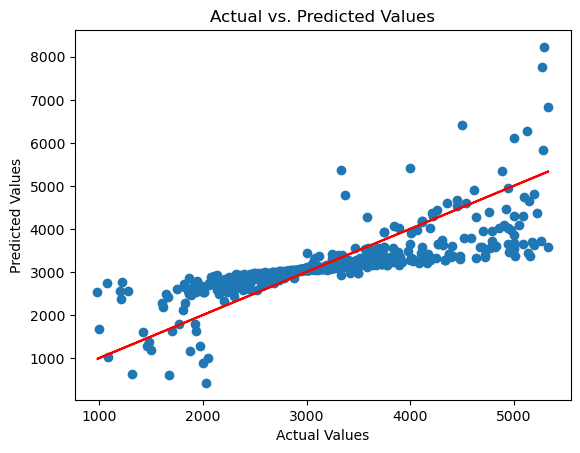

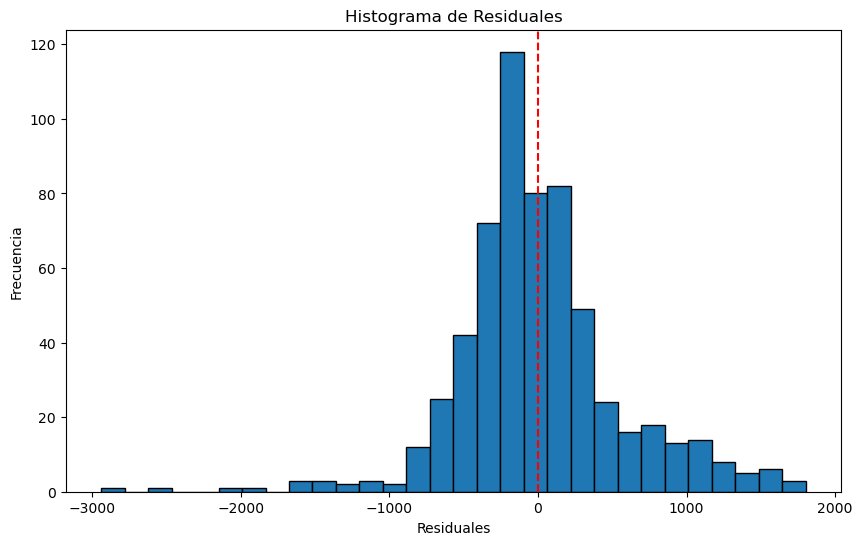

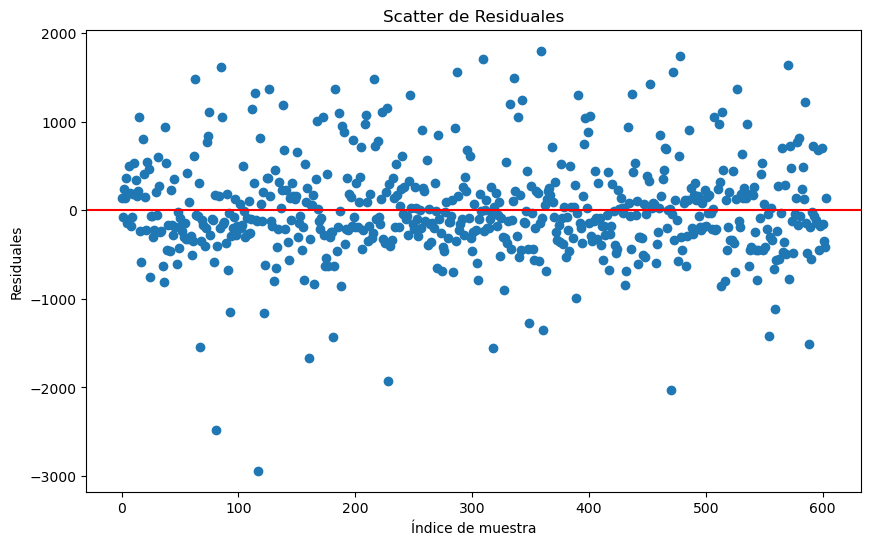

In [53]:
#Pruebo sin amenities
train_test_error_palermo(["surface_total_clean", "rooms_clean", "precios_nuevos"])

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 368.75465067171547
MSE: 264488.23924211005
RMSE: 514.2842008482372
R2: 0.6356096499747199



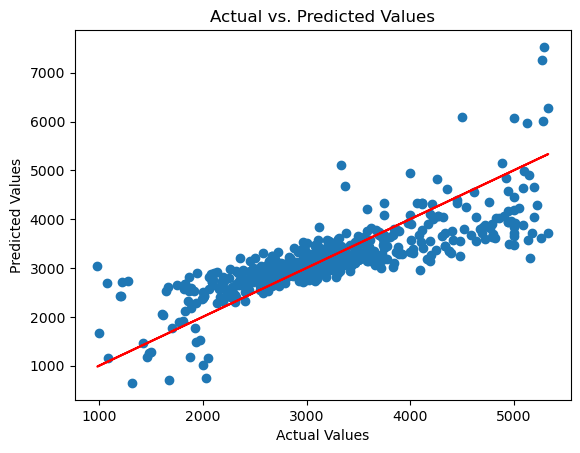

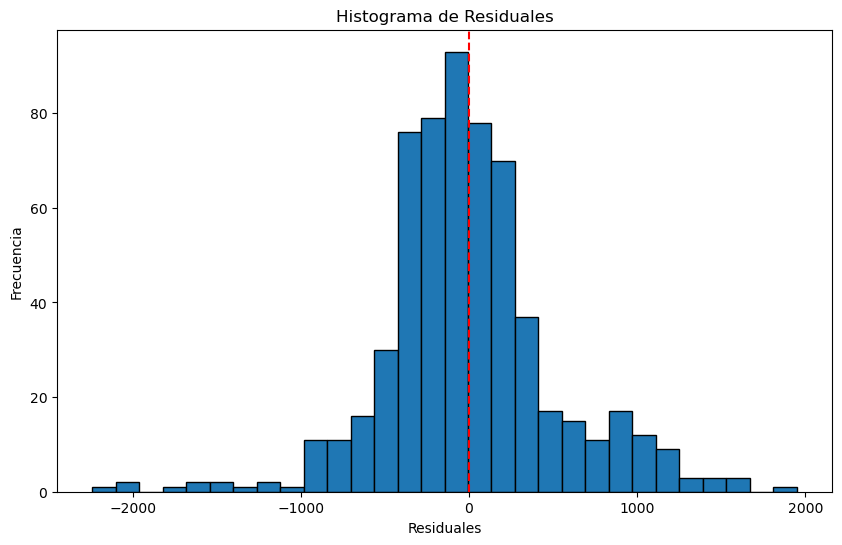

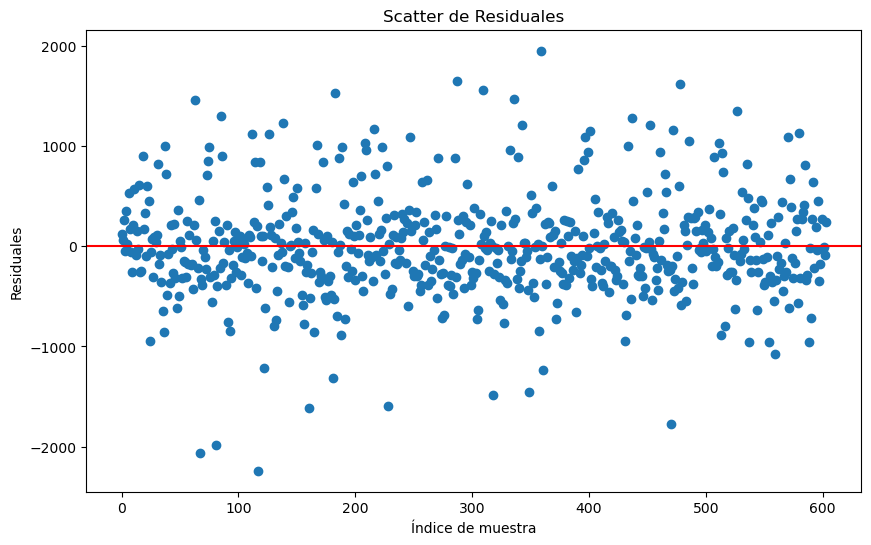

In [54]:
#Pruebo los valores con amenities
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_palermo(features)

In [55]:
def train_test_error_lasso_palermo(feature_cols):
    from sklearn.model_selection import cross_val_score
    X = properatti_palermo[feature_cols]
    y = properatti_palermo.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25], cv=5)
    
    lm_lasso.fit(X_train, y_train)
    y_pred = lm_lasso.predict(X_test)
    
    print("Alpha :", lm_lasso.alpha_)
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    #definimos los residuales para graficar
    residuales = y_test - y_pred
    
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', linestyle='-')  # Diagonal line with slope 1
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    #graficamos el histograma de residuales
    plt.figure(figsize=(10, 6))
    plt.hist(residuales, bins=30, edgecolor='black')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title('Histograma de Residuales Lasso')
    plt.xlabel('Residuales')
    plt.ylabel('Frecuencia')
    plt.show()

    #graficamos el scatter de residuales
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(len(residuales)), residuales)
    plt.axhline(y=0, color='r')
    plt.title('Scatter de Residuales Lasso')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Residuales')
    plt.show()
    return 

Alpha : 1.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 376.88418179018186
MSE: 271334.01380342955
RMSE: 520.8973159879301
R2: 0.6261780994613909



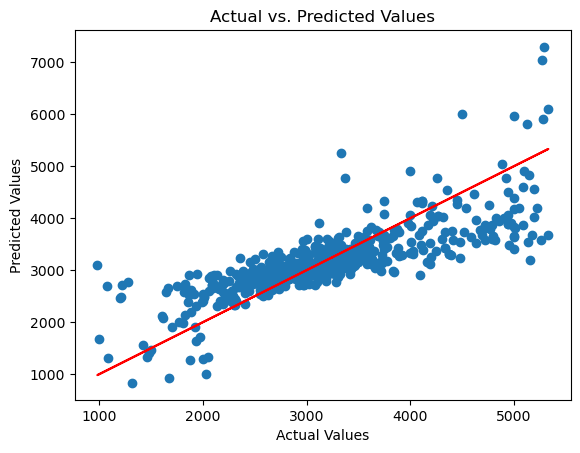

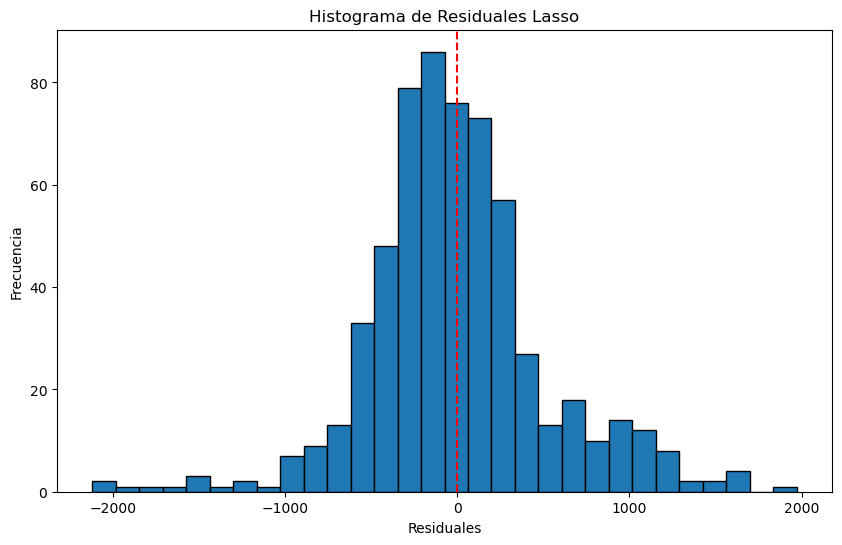

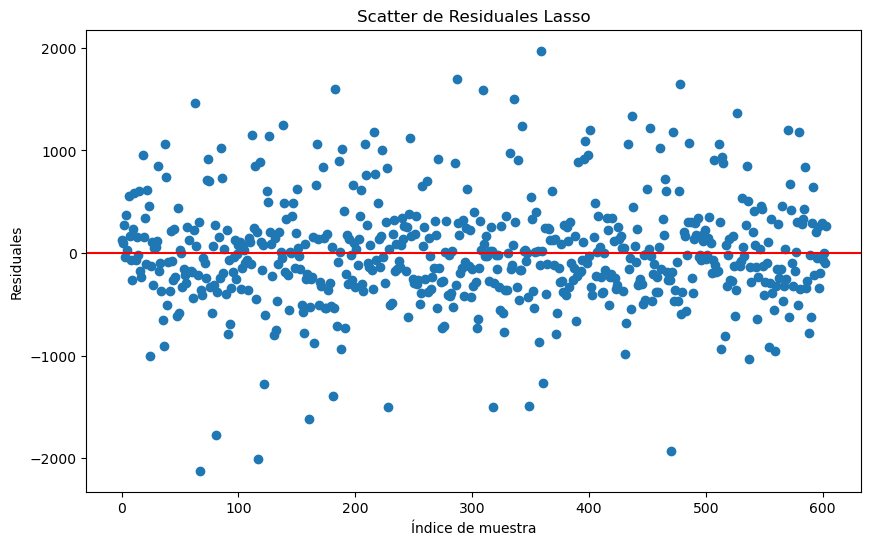

In [56]:
#Pruebo con los valores normalizados con amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_lasso_palermo(features)

Alpha : 0.1
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 397.54256081554826
MSE: 310663.74562311586
RMSE: 557.3721787307973
R2: 0.571992798877734



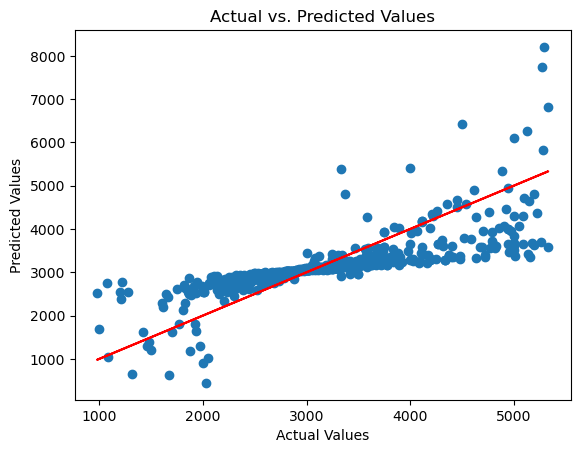

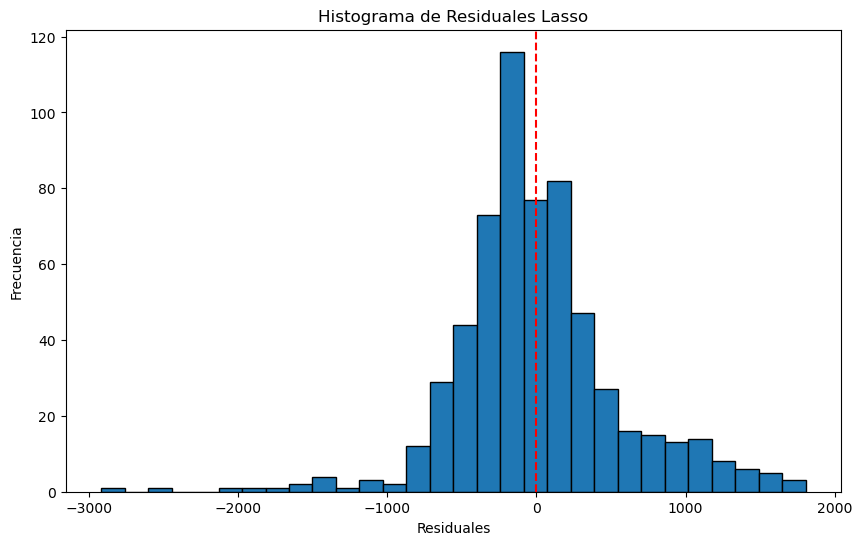

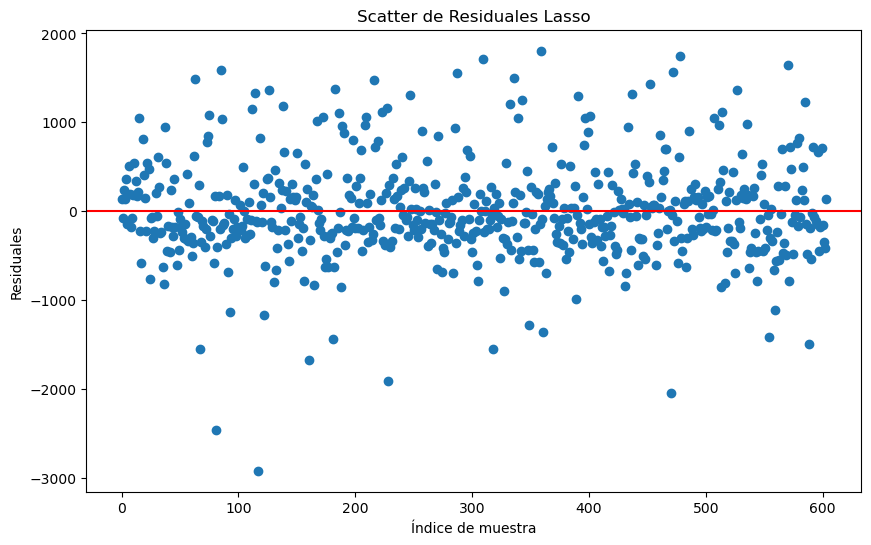

In [57]:
#Pruebo con los valores normalizados sin amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_lasso_palermo(features)

In [58]:
#HAgo la regresión lineal con Ridge
def train_test_error_ridge_palermo(feature_cols):
    X = properatti_palermo[feature_cols]
    y = properatti_palermo.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25])
    
    lm_ridge.fit(X_train, y_train)
    y_pred = lm_ridge.predict(X_test)
    print("Alpha :", lm_ridge.alpha_)
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()

    #definimos los residuales para graficar
    residuales = y_test - y_pred

    
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', linestyle='-')  # Diagonal line with slope 1
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()
    
    #graficamos el histograma de residuales
    plt.figure(figsize=(10, 6))
    plt.hist(residuales, bins=30, edgecolor='black')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title('Histograma de Residuales Ridge')
    plt.xlabel('Residuales')
    plt.ylabel('Frecuencia')
    plt.show()



    stats.probplot(residuales, dist="norm", plot=plt)
    plt.title('QQ Plot')
    plt.show()
    
    #graficamos el scatter de residuales
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(len(residuales)), residuales)
    plt.axhline(y=0, color='r')
    plt.title('Scatter de Residuales Ridge')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Residuales')
    plt.show()
    return 

Alpha : 0.1
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 375.7272191725203
MSE: 270148.71427991474
RMSE: 519.7583229539617
R2: 0.6278111085868477

Lowest y_pred value: 801.105677283947
139
Unnamed: 0                               9279
barrio                                Palermo
price_usd_per_m2                  3888.888889
surface_total_clean                      45.0
rooms_clean                               1.0
precios_nuevos                       175000.0
amenities                                   0
estacionamiento                             1
sum                                         0
pileta                                      0
parrilla                                    0
gimnasio                                    0
lavadero                                    0
solarium                         

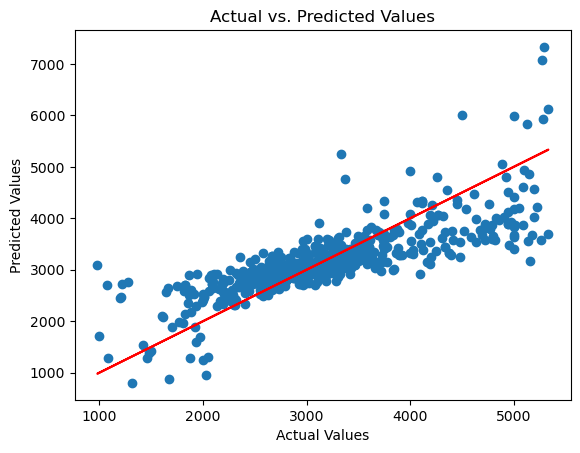

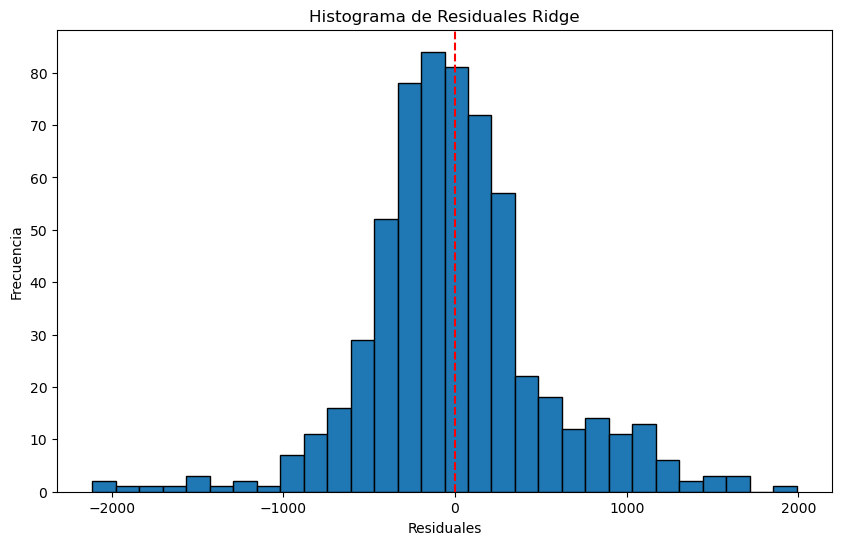

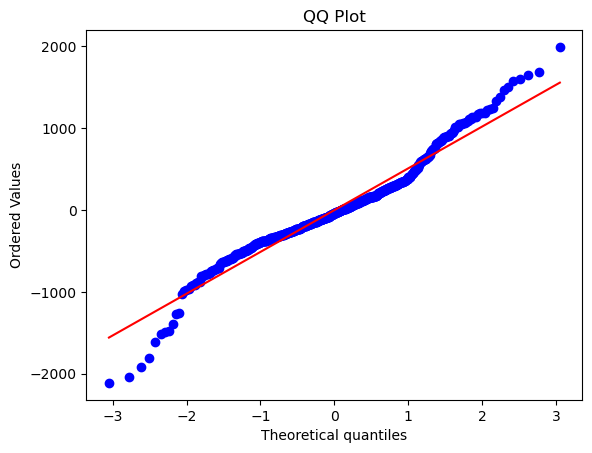

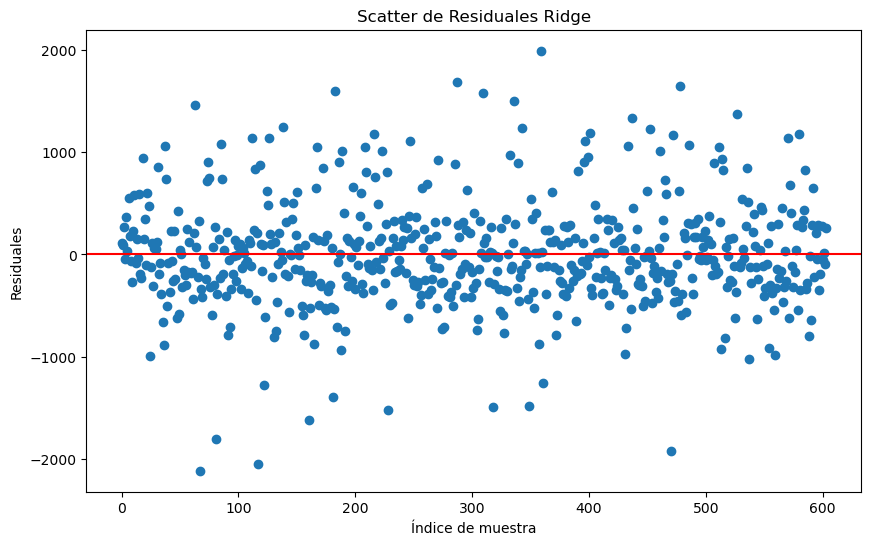

In [59]:
#Pruebo con los valores normalizados con amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_ridge_palermo(features)


Alpha : 0.1
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 404.7701558929456
MSE: 317287.5897795943
RMSE: 563.2828683526549
R2: 0.5628670059970811

Lowest y_pred value: 629.7476567098925
85
Unnamed: 0                               7417
barrio                                Palermo
price_usd_per_m2                  2444.444444
surface_total_clean                      90.0
rooms_clean                               4.0
precios_nuevos                       220000.0
amenities                                   1
estacionamiento                             0
sum                                         0
pileta                                      0
parrilla                                    0
gimnasio                                    0
lavadero                                    1
solarium                                    0
quincho                                     0
baulera                                     0
terraza                   

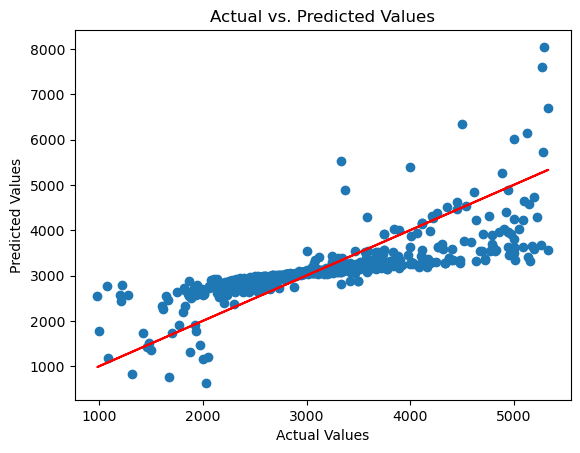

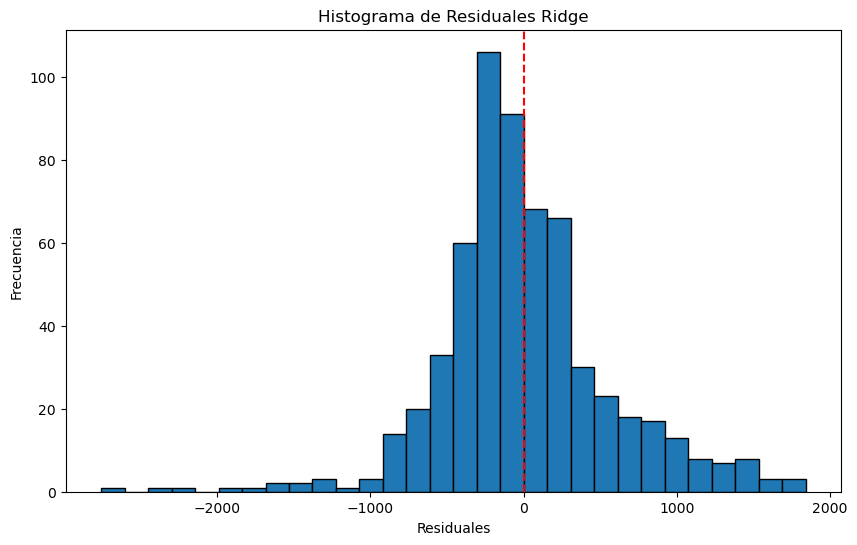

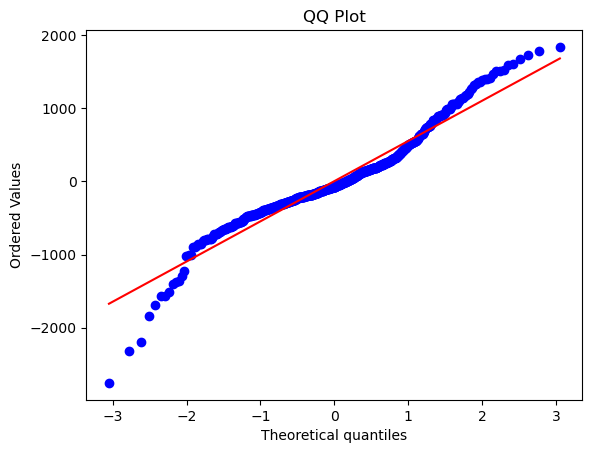

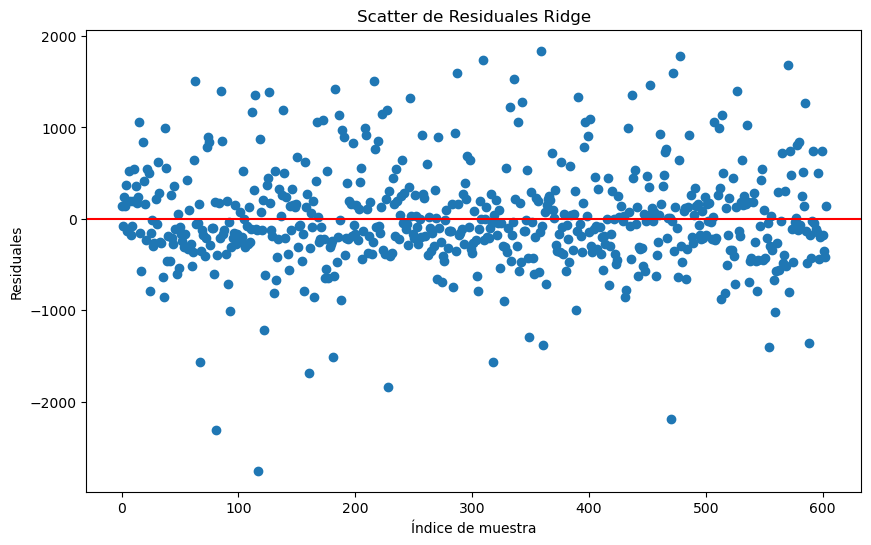

In [60]:
#Pruebo con los valores normalizados sin amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_ridge_palermo(features)